##  Introduction

Extracting meaningful insights from datasets requires cleaning — lots of it. So, it's critical to know how to manipulate data quickly and efficiently.

In this lesson, we'll show you how to aggregate data with pandas. Here are a couple of takeaways you can expect:

- Different techniques for aggregating data
- Building intuition around the groupby operation

To get the most out of this lesson, you'll need to be familiar with programming in Python, and you'll need basic knowledge of pandas DataFrames and Series. You'll also need to know some data exploration methods in pandas, such as the info and head methods, how to select values and filter a DataFrame, and how to create visualizations in pandas and Matplotlib. If you need to brush up on any of these skills, feel free to pop into one of our other courses for a refresh.

In this lesson, we'll work with the World Happiness Report, which assigns each country a happiness score based on poll results.

Throughout this lesson, we'll try to answer the following questions:

- How can aggregating the data give us more insight into happiness scores?
- How did world happiness change from 2015 to 2017?
- Which factors contribute the most to the happiness score?

## Introduction to the Data

Let's start by looking at the World Happiness Report for 2015. You can find the data [here](https://www.kaggle.com/unsdsn/world-happiness).

The dataset is a CSV file called World_Happiness_2015.csv. Here are the descriptions for some of the columns we'll be working with:

- Country — name of the country
- Region — name of the region the country belongs to
- Happiness Rank — the rank of the country, as determined by its happiness score
- Happiness Score — a score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- Family — the estimated extent to which family contributes to the happiness score
- Freedom — the estimated extent to which freedom contributes to the happiness score
- Generosity — the estimated extent to which generosity contributes to the happiness score

To begin, let's read our dataset into a pandas DataFrame and inspect it.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
happiness2015 = pd.read_csv('../../Datasets/World_Happiness_2015.csv')

In [4]:
happiness2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
happiness2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Using Loops to Aggregate Data

First, let's visualize the happiness score of each country in happiness2015:

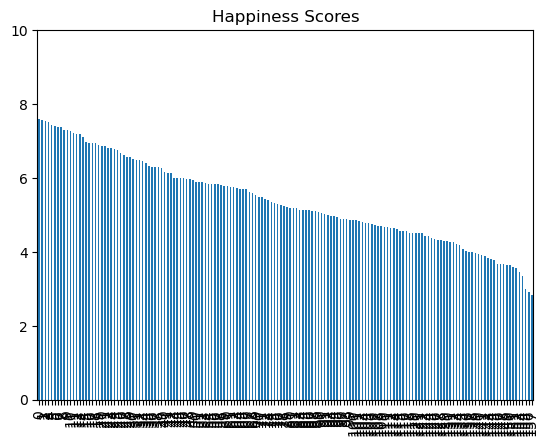

In [6]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))
plt.show()

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the happiness2015 DataFrame is assigned to a region, specified in the Region column. We can use the Series.unique() method to confirm the unique regions:

In [7]:
unique_regions = happiness2015['Region'].unique()
unique_regions

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

Let's try plotting only one region:

<Axes: ylabel='Country'>

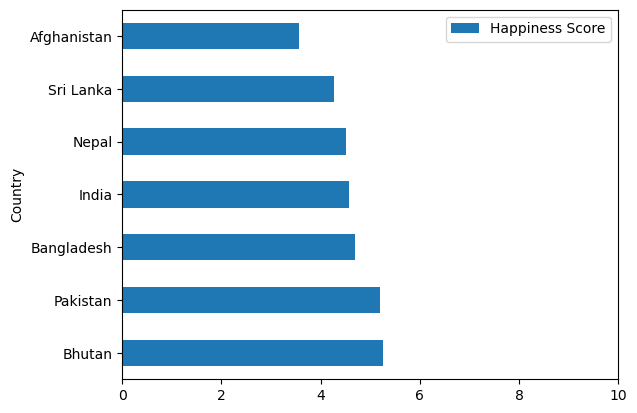

In [13]:
so_asia = happiness2015[happiness2015['Region'] == 'Southern Asia']

so_asia.plot.barh(x='Country', y='Happiness Score',
                 xlim=(0,10))

<Axes: title={'center': 'Southern Asia Happiness Scores'}, ylabel='Country'>

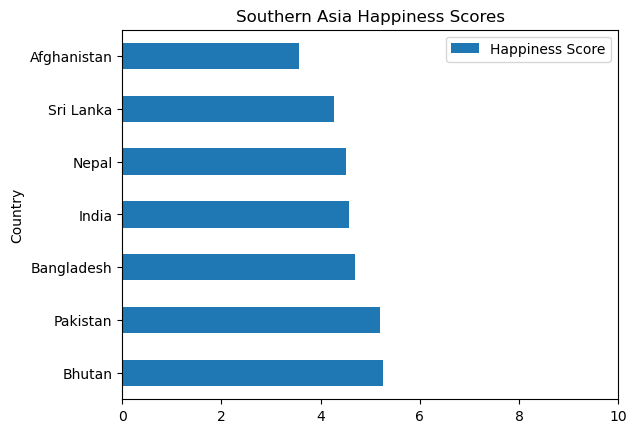

In [12]:
so_asia.plot(x='Country', y='Happiness Score', kind='barh', title='Southern Asia Happiness Scores', xlim=(0,10))

It's much easier to read this visualization — we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions.

It's much easier to read this visualization — we can clearly see the labels and values. However, we wouldn't know if the Southern Asia region is representative of the entire world unless we look at the other regions.

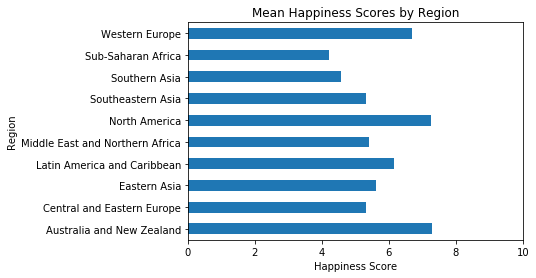

In this lesson, we'll learn how to perform different kinds of aggregations, applying a statistical operation to groups of our data, and create visualizations like the one above.

Our process will look like this:

- Identify each unique group in the data set.
- For each group, we'll do the following:
  - select only the rows corresponding to that group
  - calculate the average for those rows

Let's use this process to find the mean happiness score for each region.

In [14]:
unique_regions

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [25]:
mean_scores = {}

for region in unique_regions:
    # get the data for each region
    region_data = happiness2015[happiness2015['Region'] == region]
    
    # calculate the mean per region
    mean_score = region_data['Happiness Score'].mean()
    mean_scores[region] = mean_score

In [26]:
mean_scores

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.1446818181818195,
 'Southeastern Asia': 5.317444444444444,
 'Central and Eastern Europe': 5.332931034482757,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.2028,
 'Southern Asia': 4.580857142857143}

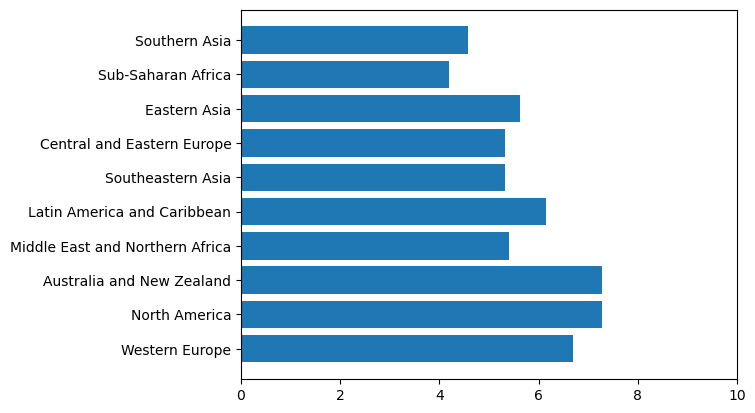

In [29]:
plt.barh(list(mean_scores.keys()), list(mean_scores.values()))
plt.xlim(0,10)
plt.show()

##  The GroupBy Operation

Let's break down the code we wrote above

1. Split the DataFrame into groups
2. Apply a function to each group
3. Combine the results into one data structure

In [31]:
mean_happiness = {}
regions = happiness2015['Region'].unique()

for r in regions:
    #1. Split the DataFrame into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean

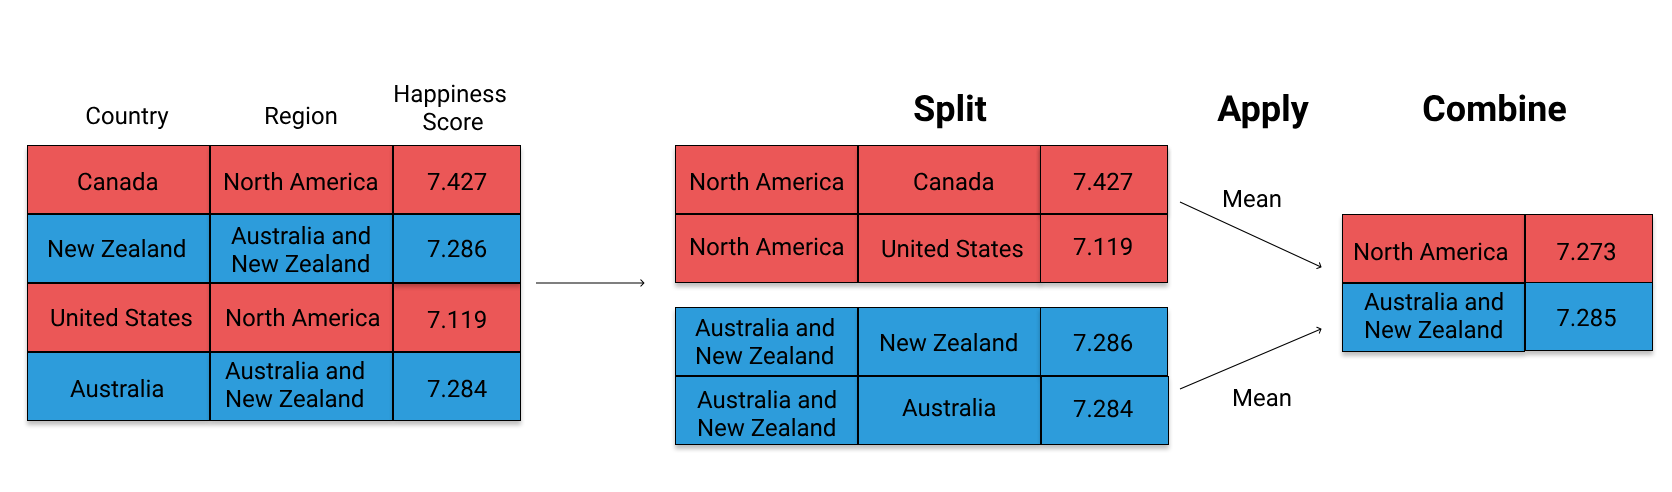

As with many other common tasks, pandas has a built-in operation for this process. The [groupby operation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) performs the "split-apply-combine" process on a DataFrame, but it condenses it into two steps:

- create a GroupBy object
- call a function on the GroupBy object

The GroupBy object (distinct from a DataFrame or series object) allows us to split the DataFrame into groups, but only in an abstract sense. Nothing actually gets computed until a function is called on the GroupBy object.

You can think of the groupby operation like this. Imagine a DataFrame as a structure made of stacking blocks in all different colors and sizes.

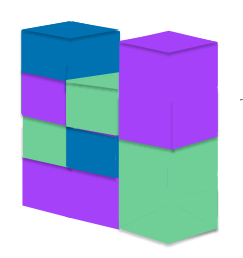

You know you'll eventually want to group the blocks according to color, but you don't know yet what you want to do with them after. Using the groupby process, we would first create a mapping document, the GroupBy object, containing information on how to group the blocks by color and where each block is in the original structure.

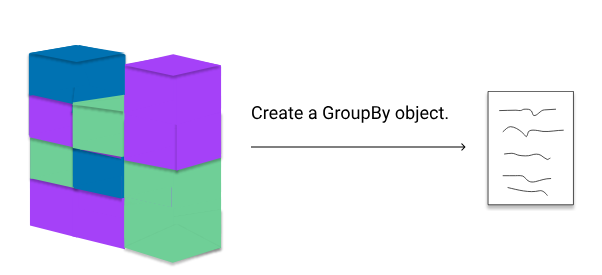

Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. For example, let's say our manager asks us first to build another structure using the biggest block from each color.

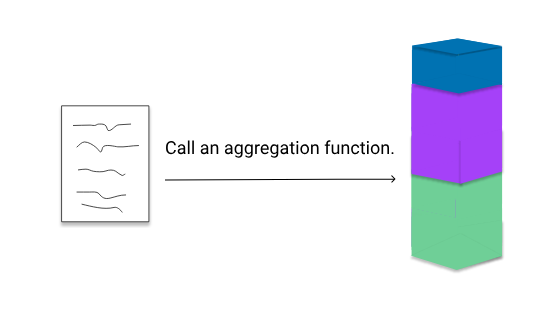

Then, she asks us to build another structure using the block size that appears most frequently in each color.

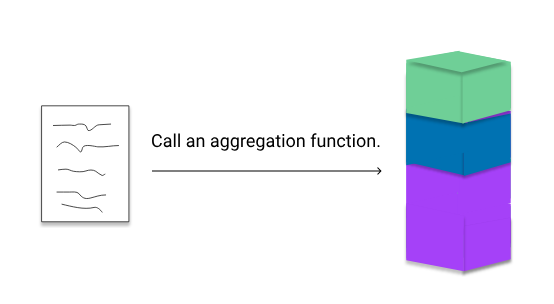

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original DataFrame. By working with the groupby operation, we make our code faster, more flexible, and easier to read.

## Creating GroupBy Objects

The first step in the groupby operation is to create a GroupBy object:

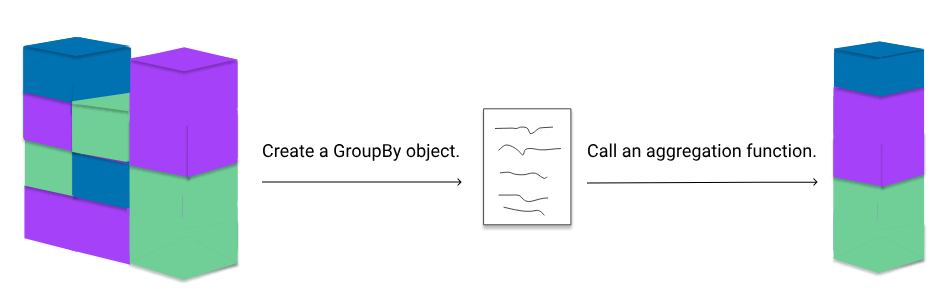

To create a GroupBy object, we use the [DataFrame.groupby() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html):

In [ ]:
df.groupby('col')

col is the column you want to use to group the dataset. Note that you can also group the data set on multiple columns by passing a list into the DataFrame.groupby() method. However, for our purposes here, we'll focus on grouping the data by just one column in this lesson.

When choosing the column, think about which columns you could use to split the dataset into groups. To put it another way, look at columns with the same value for multiple rows.

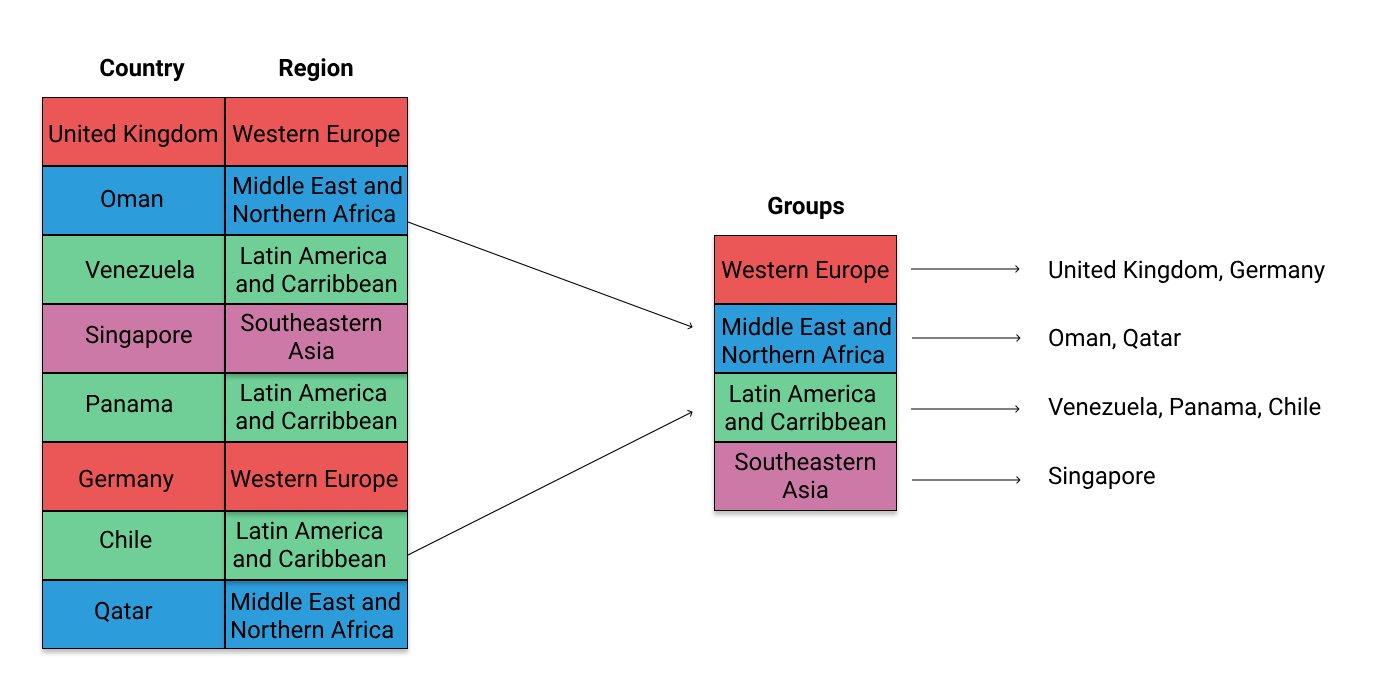

We can see from the rows above that the Region column fits this criteria. Let's confirm the number of regions and the number of unique values in each region for the entire DataFrame with the Series.value_counts() method:

In [32]:
happiness2015['Region'].value_counts()

Region
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: count, dtype: int64

Since there's a small number of groups, and each group contains more than one unique value, we can confirm the Region column is a good candidate to group by.

Next, let's create a Groupby object and group the DataFrame by the Region column:

In [33]:
happiness2015.groupby('Region')

Don't be alarmed! This isn't an error. This is telling us that an object of type GroupBy was returned, just like we expected.

Before we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the [GroupBy.get_group() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.get_group.html) to select data for a certain group.

For example, to select the data for just the North America group, we'd pass 'North America' into the get_group() method:

In [35]:
grouped = happiness2015.groupby('Region')
grouped

In [36]:
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [39]:
# select data for Australia and New Zealand
grouped.get_group('Australia and New Zealand')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


## Exploring GroupBy Objects

In the last exercise, we used the GroupBy.get_group() method to select the Australia and New Zealand group. The result is a DataFrame containing just the rows for the countries in the Australia and New Zealand group:

We can also use the[ GroupBy.groups attribute](https://pandas.pydata.org/pandas-docs/stable/reference/groupby.html#splitting-an-object-into-groups) to get more information about the GroupBy object:

In [41]:
grouped = happiness2015.groupby('Region')
grouped.groups

{'Australia and New Zealand': [8, 9], 'Central and Eastern Europe': [30, 43, 44, 51, 53, 54, 55, 58, 59, 61, 63, 68, 69, 72, 76, 79, 82, 85, 86, 88, 92, 94, 95, 103, 105, 110, 126, 129, 133], 'Eastern Asia': [37, 45, 46, 71, 83, 99], 'Latin America and Caribbean': [11, 13, 15, 22, 24, 26, 29, 31, 32, 39, 40, 41, 42, 47, 50, 52, 56, 57, 64, 97, 104, 118], 'Middle East and Northern Africa': [10, 19, 21, 27, 34, 38, 48, 62, 67, 75, 81, 91, 102, 106, 107, 109, 111, 134, 135, 155], 'North America': [4, 14], 'Southeastern Asia': [23, 33, 60, 73, 74, 89, 98, 128, 144], 'Southern Asia': [78, 80, 108, 116, 120, 131, 152], 'Sub-Saharan Africa': [70, 77, 84, 90, 93, 96, 100, 112, 113, 114, 115, 117, 119, 121, 122, 123, 124, 125, 127, 130, 132, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 148, 149, 150, 151, 153, 154, 156, 157], 'Western Europe': [0, 1, 2, 3, 5, 6, 7, 12, 16, 17, 18, 20, 25, 28, 35, 36, 49, 65, 66, 87, 101]}

The result is a dictionary in which each key corresponds to a region name. See below for the first couple of keys:

Notice that the values include the index for each row in the original happiness2015 DataFrame with the corresponding region name. To prove this, let's again look at the data for the Australia and New Zealand group:

Then, let's filter on indices 8 and 9 in happiness2015:

In [42]:
happiness2015.iloc[8:10]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


And we see that those rows correspond to Australia and New Zealand! Notice that the get_group() method also returned the same DataFrame above.

Next, let's continue building our intuition by practicing using the groups attribute and get_group() method.

Prove that the values for the "North America" group in the dictionary returned by grouped.groups above correspond to countries in North America in the happiness2015 DataFrame.

In [47]:
grouped.get_group('North America')

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


In [45]:
grouped.groups['North America']

Index([4, 14], dtype='int64')

In [46]:
happiness2015.iloc[[4, 14]]

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
14,United States,North America,15,7.119,0.03839,1.39451,1.24711,0.86179,0.54604,0.15890,0.40105,2.51011


## Common Aggregation Methods with Groupby

In the previous exercise, we confirmed that the values for the "North America" group returned by grouped.groups do correspond to the countries in North_America in the happiness2015 DataFrame.

Now that we have a good understanding of GroupBy objects, let's use them to aggregate our data. In order to aggregate our data, we must call a function on the GroupBy object.

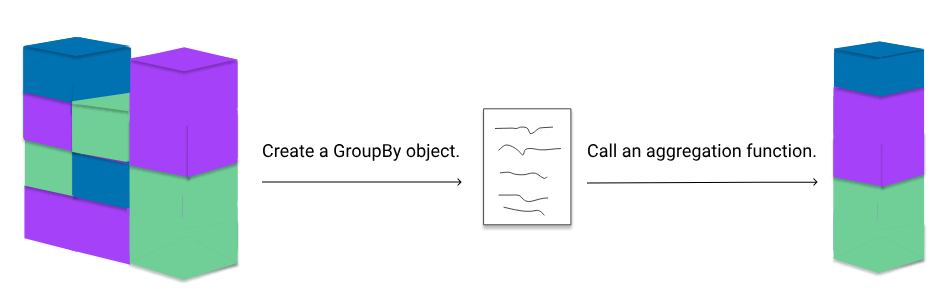

A basic example of aggregation is computing the number of rows for each of the groups. We can use the GroupBy.size() method to confirm the size of each region group:

In [48]:
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Notice that the result is a Series and contains just one value for each group. Each value represents the number of rows in each group. For example, the "Australia and New Zealand" group contains two rows.

Pandas has built in a number of other [common aggregation methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html):

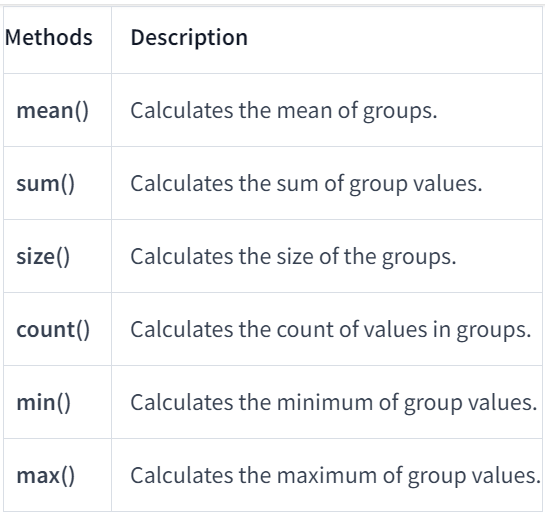

Because we might be working with columns of dfferent data types, it's often good practice to specify the numeric_only parameter for aggregation methods like mean(), sum(), min(), and max() to avoid TypeErrors. This parameter determines whether to include only numeric columns in the computation. By setting numeric_only=True, we ensure that only numeric columns are considered for the aggregation, avoiding potential errors with non-numeric data.

In [50]:
grouped.mean(numeric_only=True)

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,,,,,,,,,,
Australia and New Zealand,9.500000,7.285000,0.037270,1.291880,1.314450,0.919965,0.645310,0.392795,0.455315,2.265355
Central and Eastern Europe,79.000000,5.332931,0.045208,0.942438,1.053042,0.718774,0.358269,0.086674,0.152264,2.021400
Eastern Asia,64.500000,5.626167,0.037225,1.151780,1.099427,0.877388,0.462490,0.127695,0.225885,1.681607
Latin America and Caribbean,46.909091,6.144682,0.061127,0.876815,1.104720,0.703870,0.501740,0.117172,0.217788,2.622577
Middle East and Northern Africa,77.600000,5.406900,0.046337,1.066974,0.920490,0.705615,0.361751,0.181702,0.190376,1.980008
North America,10.000000,7.273000,0.036960,1.360400,1.284860,0.883710,0.589505,0.244235,0.429580,2.480935
Southeastern Asia,81.222222,5.317444,0.042691,0.789054,0.940468,0.677357,0.557104,0.151276,0.419261,1.783020
Southern Asia,113.142857,4.580857,0.032161,0.560486,0.645321,0.540830,0.373337,0.102536,0.341429,2.016769
Sub-Saharan Africa,127.900000,4.202800,0.055299,0.380473,0.809085,0.282332,0.365944,0.123878,0.221137,2.019980


## Aggregating Specific Columns with Groupby

In the previous exercise, we grouped happiness2015 by region and calculated the mean of each region for each numeric column:

In [51]:
grouped = happiness2015.groupby('Region')
grouped_mean = grouped.mean(numeric_only=True)

You may have noticed that Region appears in a different row than the rest of the column names. Because we grouped the DataFrame by region, the unique values in Region are used as the index. Up until now, we've mostly worked with DataFrames with a numeric index.

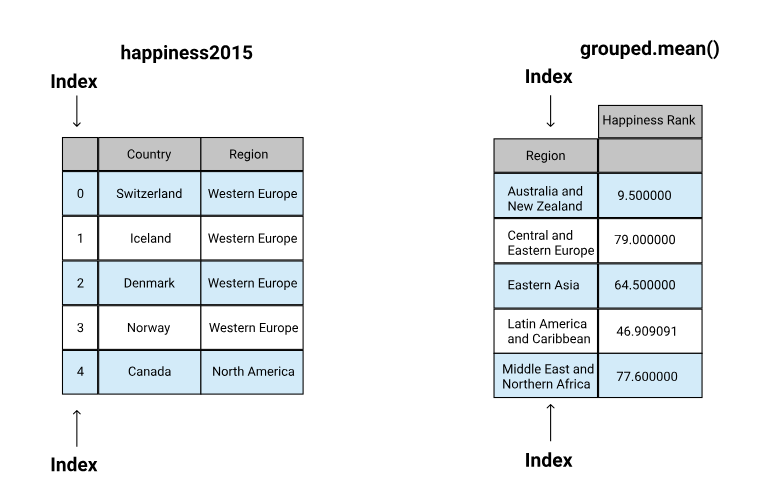

In some cases, we may want to only aggregate one particular column in the original DataFrame. GroupBy objects actually support column indexing, just like DataFrames. You can select specific columns for a GroupBy object the same way you would for a DataFrame:

In [54]:
happiness2015.groupby('Region')['Happiness Score'].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

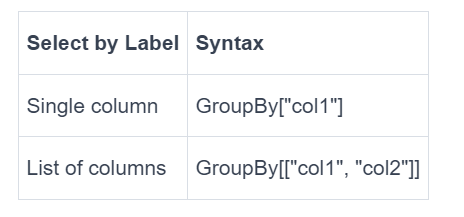

Note: In the previous exercise, we used numeric_only=True with grouped.mean() because we were calculating the mean for all columns in the grouped DataFrame. When we select a specific column from a GroupBy object, we're already working with numeric data, so numeric_only is not necessary. The mean() method will work directly on this selected column without needing to specify the numeric_only parameter.

In [55]:
happiness2015.groupby('Region')['Happiness Score'].mean()

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

## Introduction to the Agg() Method

We learned in the previous exercise that we can use indexing to aggregate one column at a time:

In [56]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

However, what if we want to apply more than one kind of aggregation to a column at a time?

For example, suppose we want to calculate both the mean and the maximum happiness score for each region. Using what we've learned so far, we'd first have to calculate the mean, like we did above, and then calculate the maximum separately.

Luckily, however, th[e GroupBy.agg() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html) can perform both aggregations at once. We can use the following syntax:

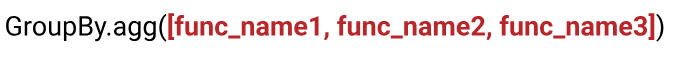

In [69]:
happiness2015.groupby('Region')['Happiness Score'].agg([max, min, 'mean', 'median', sum, 'size', 'count'])

,max,min,mean,median,sum,size,count
Region,,,,,,,
Australia and New Zealand,7.286,7.284,7.285000,7.285,14.570,2,2
Central and Eastern Europe,6.505,4.218,5.332931,5.286,154.655,29,29
Eastern Asia,6.298,4.874,5.626167,5.729,33.757,6,6
Latin America and Caribbean,7.226,4.518,6.144682,6.149,135.183,22,22
Middle East and Northern Africa,7.278,3.006,5.406900,5.262,108.138,20,20
North America,7.427,7.119,7.273000,7.273,14.546,2,2
Southeastern Asia,6.798,3.819,5.317444,5.360,47.857,9,9
Southern Asia,5.253,3.575,4.580857,4.565,32.066,7,7
Sub-Saharan Africa,5.477,2.839,4.202800,4.272,168.112,40,40


Note that when we pass the functions into the agg() method as arguments, we don't use parentheses after the function names. For example, when we use np.mean, we refer to the function object itself and treat it like a variable, whereas np.mean() would be used to call the function and get the returned value.

We can also pass the function names in as strings, but we won't cover that in this lesson. (You can refer to [this documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) for more information on this topic.)

In [71]:
happiness2015.groupby('Region')['Happiness Score'].agg([np.mean, np.max])

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


## Computing Multiple and Custom Aggregations with the Agg() Method

In the previous exercise, we learned we can use the GroupBy.agg() method to do the following:

1. perform more than one aggregation at once
2. compute custom aggregations

To compute multiple aggregations at once, we passed a list of the function names into the agg method:

In [72]:
grouped = happiness2015.groupby('Region')
happy_grouped = grouped['Happiness Score']
happy_mean_max = happy_grouped.agg([np.mean, np.max])
happy_mean_max

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


Our result is a DataFrame containing both the mean and maximum happiness scores for each region. Note that the columns are named for the functions themselves.

We also used a custom function to aggregate the data:

In [73]:
def dif(group):
    return group.max() - group.mean()
print(happy_grouped.agg(dif))

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64


Above, we calculated the difference between the mean and maximum values for each region. Because the agg() method allows us to create custom aggregation functions, it gives us much more flexibility in how we can transform our data.

Up until this point, we've deliberately split creating the GroupBy object and calling a function into separate steps to make it easier to understand. However, if you read through other teaching resources, you may see instances when the statements are combined:

In [74]:
happiness2015.groupby('Region')['Happiness Score'].agg(dif)

Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Both approaches will return the same result. However, if you plan on computing multiple aggregations with the same GroupBy object, we recommend that you save the object to a variable first. (You may want to save it to a variable in every cases to make your code easier to understand. As we compute more complex aggregations, the syntax can become confusing!)

## Aggregation with Pivot Tables

In the previous exercise, we tried to predict the results of the following code:

In [75]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
happiness_means

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64

When you printed happiness_means, you should've seen that the values in the Region column are the index of the resulting series and the Happiness Score column contained the values that would be aggregated:

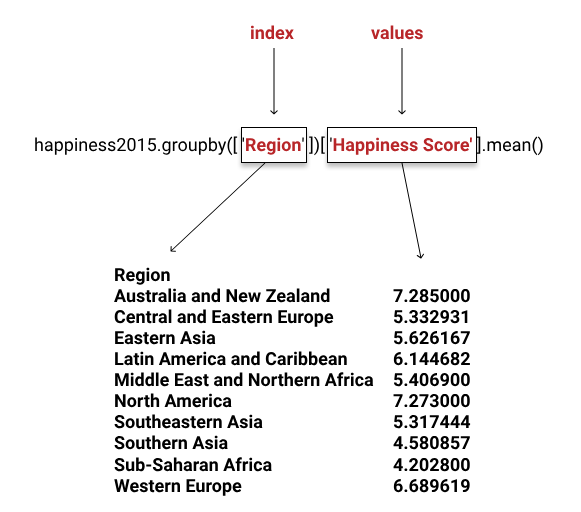

Index and values are actually arguments used in another method used to aggregate data — the [DataFrame.pivot_table() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html). 

This df.pivot_table() method can perform the same kinds of aggregations as the df.groupby method and make the code for complex aggregations easier to read.

If you're an Excel user, you may have already drawn comparisons between the groupby operation and Excel pivot tables. If you've never used Excel, don't worry! You don't need to know Excel for this lesson. We'll demonstrate the pivot_table() method next.

Below, we use the df.pivot_table() method to perform the same aggregation as above.

In [77]:
happiness2015.pivot_table(values='Happiness Score', index='Region',
                         aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


Keep in mind that this method returns a DataFrame, so we can apply normal DataFrame filtering and methods to the result. For example, let's use the DataFrame.plot() method to create a visualization. Note that we exclude aggfunc below because the mean is the default aggregation function of df.pivot_table().

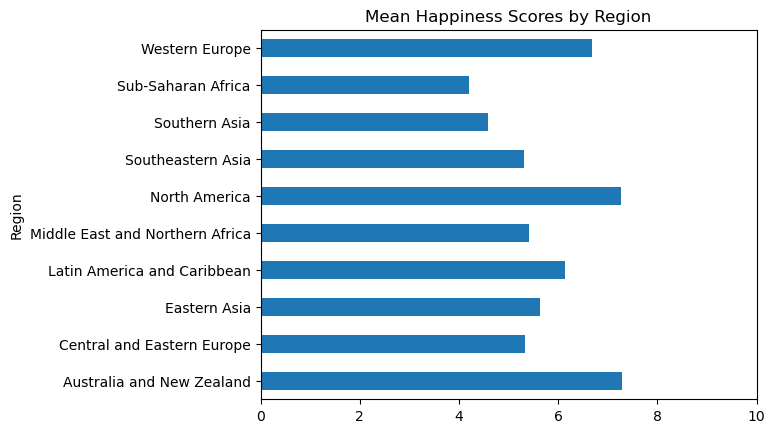

In [78]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

Next, let's explore a feature unique to the df.pivot_table() method.

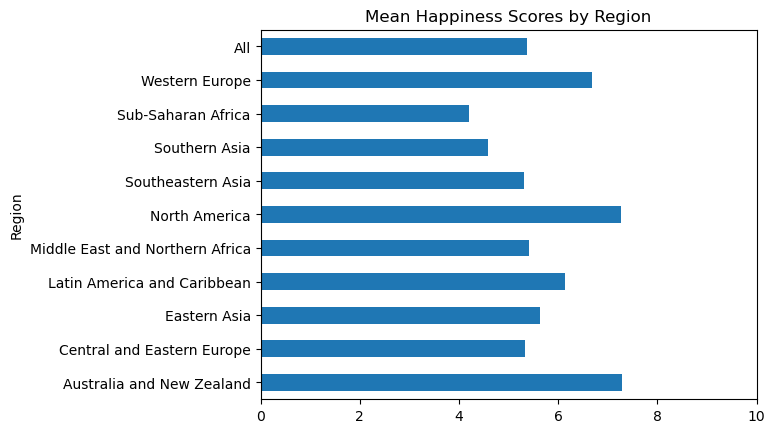

In [86]:
pv_happiness = happiness2015.pivot_table('Happiness Score',
                                         'Region', margins=True)
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)
plt.show()

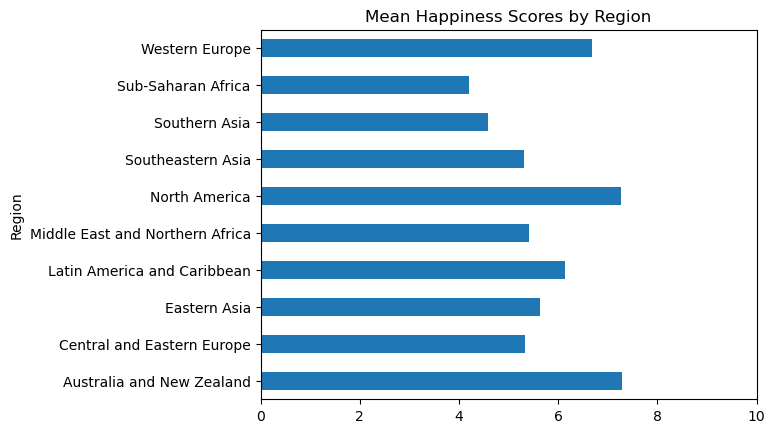

In [85]:
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region',
                  xlim=(0,10), legend=False)
plt.show()

In [88]:
happiness2015['Happiness Score'].mean()

5.375734177215189

## Aggregating Multiple Columns and Functions with Pivot Tables

In the previous exercise, we learned that when we set the margins parameter equal to True, All will be added to the index of the resulting DataFrame and the corresponding value will be the result of applying the aggregation method to the entire column. In our example, All is the mean of the Happiness Score column.

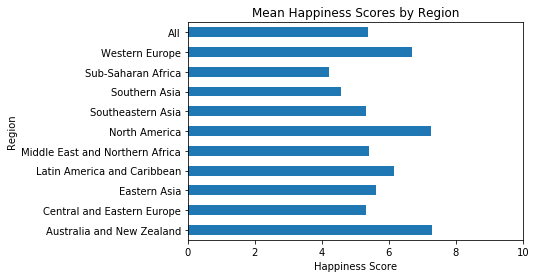

The pivot_table method also allows us to aggregate multiple columns and apply multiple functions at once.

In [89]:
grouped_by_region = happiness2015.pivot_table(['Happiness Score', 'Family'], 'Region')
grouped_by_region

,Family,Happiness Score
Region,,
Australia and New Zealand,1.314450,7.285000
Central and Eastern Europe,1.053042,5.332931
Eastern Asia,1.099427,5.626167
Latin America and Caribbean,1.104720,6.144682
Middle East and Northern Africa,0.920490,5.406900
North America,1.284860,7.273000
Southeastern Asia,0.940468,5.317444
Southern Asia,0.645321,4.580857
Sub-Saharan Africa,0.809085,4.202800


To apply multiple functions, we can pass a list of the functions into the aggfunc parameter:

In [90]:
mean_min_max_by_region = happiness2015.pivot_table('Happiness Score', 'Region', aggfunc=[np.mean, np.min , np.max], margins=True)

In [96]:
happiness2015.groupby('Region')[['Happiness Score', 'Family']].agg([np.min, np.max, np.mean])

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

In [100]:
happiness2015.pivot_table(values=['Happiness Score', 'Family'],
                         index='Region', aggfunc=[np.min, np.max, np.mean],
                         margins=True)

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734

In this lesson, we learned how to use the groupby operation and the df.pivot_table() method for aggregation. In the next lesson, we'll learn how to combine datasets using the pd.concat() and pd.merge() functions